# 마켓 데이터 크롤링 - 개별주식 가격 데이터 (morningstar)

<img src="http://i.imgur.com/grQHNKG.jpg">

* 개별 종목 가격 데이터: 야후 파이낸스, 구글 파이낸스 대체 
* pandas_datareader + morningstar
* MultiIndex 가격 데이터와 차트 그리기

### 2018 FinanceData http://fb.com/financedata

<!-- TEASER_END -->

# 모듈 임포트와 버전 확인

In [1]:
import pandas as pd
pd.__version__

'0.22.0'

In [2]:
import pandas_datareader as pdr
pdr.__version__

'0.6.0'

pandas_datareader로 다양한 시계열 데이터들을 손쉽게 가져올 수 있다. 특히, 개별 종목의 과거 주식 가격을 가져오기 위해 구글 파이낸스와 야후 파이낸스를 많이 사용했다. 그러나, 현재 구글 파이낸스는 UNSTABLE_WARNING 를 내고, 야후 파이낸스는 더 이상 사용되지 않는다 (deprecated). 2018년 4월 현재 버전은 (pandas 0.22.0, pandas_datareader 0.6.0) 이다.

구글 파이낸스의 경우,

```python
import pandas_datareader as pdr
df = pdr.DataReader('AAPL', 'google', '2018-01-01', '2018-04-30')
```

UNSTABLE_WARNING 과 'RemoteDataError: Unable to read URL' 에러를 낸다.

야후 파이낸스의 경우,

```python
import pandas_datareader as pdr
df = pdr.DataReader('AAPL', 'yahoo', '2018-01-01')
```

ImmediateDeprecationError 에러를 낸다.


# morningstar

새로운 버전 (0.6.0)에 몇몇 데이터 소스가 추가 되었다. (Tiingo, Robinhood, Morningstar, IEX, 등) <BR>
이중 Morningstar 를 사용하여 이전의 구글 파이낸스, 야후 파이낸스를 대체할 수 있다.
    
국내 주식 종목은 종목코드 앞에 "XRKX:" 를 붙여준다

* XKRX:005930 - 삼성전자
* XKRX:091990 - 셀트리온헬스케어

In [3]:
import pandas_datareader as pdr

# 애플(AAPL) 2018년 1Q 가격 데이터 

df = pdr.DataReader('AAPL', 'morningstar', '2018-01-01', '2018-03-30')
df.tail()

Close    High     Low     Open    Volume
Symbol Date                                                 
AAPL   2018-03-26  172.77  173.10  166.44  168.070  37541236
       2018-03-27  168.34  175.15  166.92  173.680  40922579
       2018-03-28  166.48  170.02  165.19  167.250  41668545
       2018-03-29  167.78  171.75  166.90  167.805  38398505
       2018-03-30  167.78  167.78  167.78  167.780         0

In [4]:
# 삼성전자(XKRX:005930) 2018년 1Q 가격 데이터 

df = pdr.DataReader('XKRX:005930', 'morningstar', '2010-01-01', '2018-03-30')
df.tail()

Close     High      Low     Open  Volume
Symbol      Date                                                  
XKRX:005930 2018-03-26  2514000  2514000  2452000  2471000  201155
            2018-03-27  2499000  2523000  2454000  2516000  237480
            2018-03-28  2435000  2455000  2417000  2455000  303189
            2018-03-29  2452000  2478000  2416000  2435000  201340
            2018-03-30  2461000  2495000  2454000  2454000  155542

# 여러 종목을 한번에 가져오기

In [5]:
# 애플(AAPL), 삼성전자(005930) 2017년 1년 데이터를 함께 읽기

df = pdr.DataReader(['AAPL', 'XKRX:005930'], 'morningstar', '2017-01-01', '2017-12-30')
df.head()

Close      High     Low    Open    Volume
Symbol Date                                                  
AAPL   2017-01-02  115.82  115.8200  115.82  115.82         0
       2017-01-03  116.15  116.3300  114.76  115.80  28781865
       2017-01-04  116.02  116.5100  115.75  115.85  21118116
       2017-01-05  116.61  116.8642  115.81  115.92  22193587
       2017-01-06  117.91  118.1600  116.47  116.78  31751900

# df.unstack() 

종목과 날짜(Symbol, Date)가 MultiIndex 로 반환 되므로 df.unstack() 을 적절히 활용

In [6]:
df.unstack(level=0).head()

Close                  High                 Low              \
Symbol        AAPL XKRX:005930      AAPL XKRX:005930    AAPL XKRX:005930   
Date                                                                       
2017-01-02  115.82   1805000.0  115.8200   1812000.0  115.82   1794000.0   
2017-01-03  116.15   1824000.0  116.3300   1831000.0  114.76   1801000.0   
2017-01-04  116.02   1808000.0  116.5100   1826000.0  115.75   1805000.0   
2017-01-05  116.61   1778000.0  116.8642   1803000.0  115.81   1777000.0   
2017-01-06  117.91   1810000.0  118.1600   1822000.0  116.47   1802000.0   

              Open                Volume              
Symbol        AAPL XKRX:005930      AAPL XKRX:005930  
Date                                                  
2017-01-02  115.82   1799000.0         0       93012  
2017-01-03  115.80   1814000.0  28781865      147153  
2017-01-04  115.85   1825000.0  21118116      159435  
2017-01-05  115.92   1803000.0  22193587      219349  
2017-01-06  116.78   1809000.0  31751900      177619

# 2017년 삼성전자, 애플 주가 차트

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams["axes.grid"] = True

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4101758dd8>,
      dtype=object)

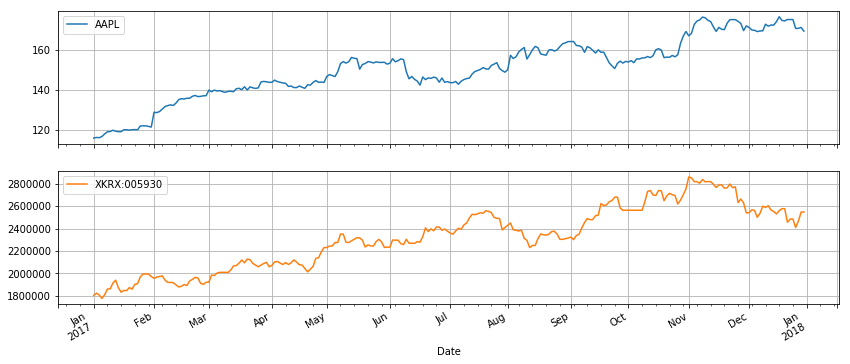

In [11]:
df.unstack(level=0)['Close'].plot(subplots=True)

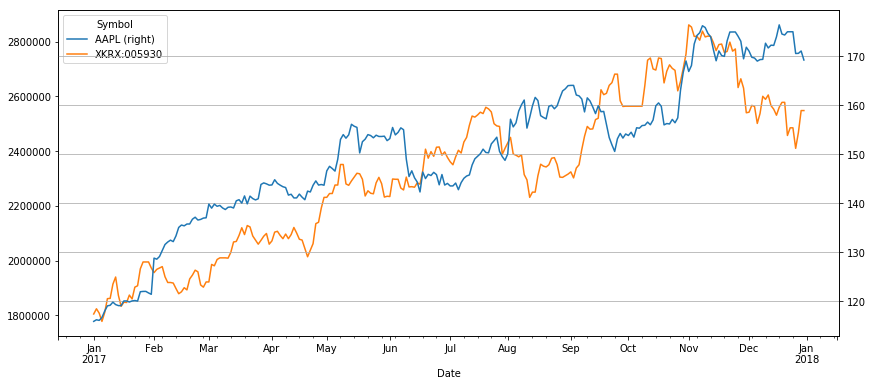

In [12]:
df.unstack(level=0)['Close'].plot(secondary_y='AAPL')

### 2017 FinanceData.KR https://fb.com/financedata